In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor

from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

import math
from tensorflow.keras.layers import LSTM
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_gamma_deviance
from itertools import cycle
import plotly.express as px

In [2]:
#Load dataset
data = pd.read_csv(r"/content/BTC-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704


In [3]:
#info about data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB
None


In [4]:
#understand the distribution of the data
print(data.describe())

               Open          High           Low         Close     Adj Close  \
count   2713.000000   2713.000000   2713.000000   2713.000000   2713.000000   
mean   11311.041069  11614.292482  10975.555057  11323.914637  11323.914637   
std    16106.428891  16537.390649  15608.572560  16110.365010  16110.365010   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      606.396973    609.260986    604.109985    606.718994    606.718994   
50%     6301.569824   6434.617676   6214.220215   6317.609863   6317.609863   
75%    10452.399414  10762.644531  10202.387695  10462.259766  10462.259766   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.713000e+03  
mean   1.470462e+10  
std    2.001627e+10  
min    5.914570e+06  
25%    7.991080e+07  
50%    5.098183e+09  
75%    2.456992e+10  
max    3.509679e+11  


In [5]:
#Checking if there is a null value
null_values = data.isnull().sum()
print(null_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
#format the date column
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
#understand correlation between the columns
print(data.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999535  0.999103  0.998839   0.998839  0.728537
High       0.999535  1.000000  0.999046  0.999489   0.999489  0.732137
Low        0.999103  0.999046  1.000000  0.999399   0.999399  0.720922
Close      0.998839  0.999489  0.999399  1.000000   1.000000  0.727443
Adj Close  0.998839  0.999489  0.999399  1.000000   1.000000  0.727443
Volume     0.728537  0.732137  0.720922  0.727443   0.727443  1.000000


<ipython-input-7-88c250d00431>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


<ipython-input-8-91d3e0b925db>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")


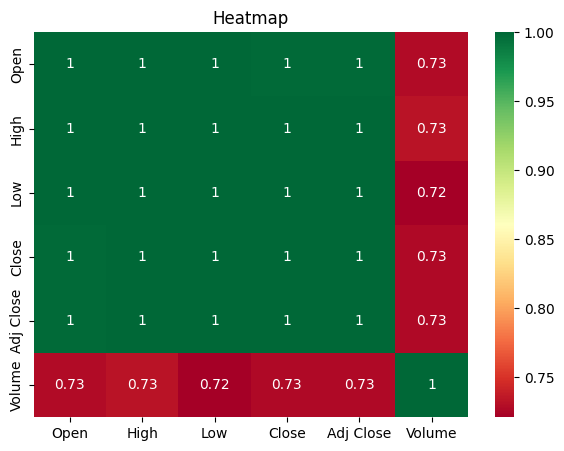

In [8]:
#explore the relationship using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.title("Heatmap")
plt.show()

In [9]:
#select the colums needed for the project(feature selection)
closedf = data[['Date','Close']]
closedf0 = data[['Date','Close']]
closedf1 = data[['Date','Close','Volume']]

<Figure size 700x500 with 0 Axes>

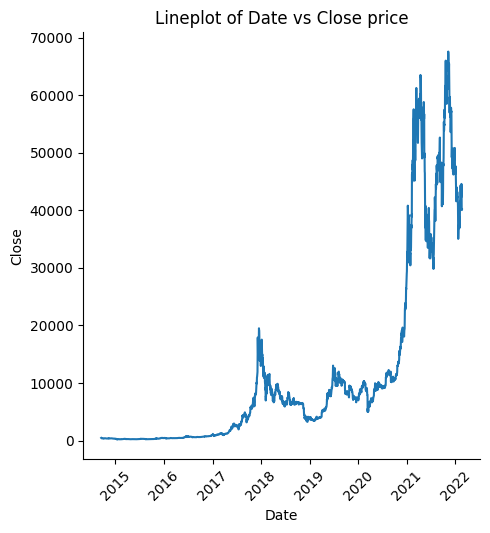

In [10]:
#Visualise the Date and close price data in line plot before filtering
fig = plt.figure(figsize = (7, 5))
sns.relplot(data = closedf, x = "Date", y = "Close", kind = "line")
plt.title("Lineplot of Date vs Close price")
plt.xticks(rotation = 45)
plt.show()

In [11]:
# print the shape of closedf
shape = closedf.shape
print("Shape of dataframe:", shape)

Shape of dataframe: (2713, 2)


In [12]:
# Filter the DataFrame to select the data sample we will use
closedf = closedf.loc[closedf['Date'] > '2021-02-19'] #after this date the data...

# Create a copy of the filtered DataFrame
close_stock = pd.DataFrame(closedf)

# Print the total data for prediction
print(f"Total data we will use for predictions: {close_stock.shape[0]}")

Total data we will use for predictions: 365


<Figure size 700x500 with 0 Axes>

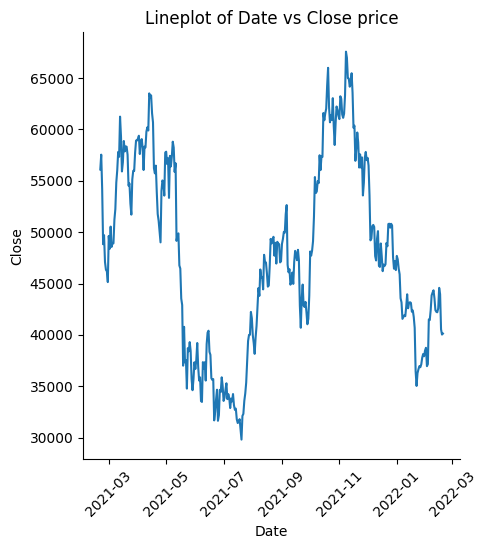

In [13]:
#Visualise the Date and close price data in line plot after filtering
fig = plt.figure(figsize = (7,5))
sns.relplot(data = close_stock, x = "Date", y = "Close", kind = "line")
plt.title("Lineplot of Date vs Close price")
plt.xticks(rotation = 45)
plt.show()

In [14]:
closedf

,Date,Close
2348,2021-02-20,56099.519531
2349,2021-02-21,57539.945313
2350,2021-02-22,54207.320313
2351,2021-02-23,48824.425781
2352,2021-02-24,49705.332031
...,...,...
2708,2022-02-15,44575.203125
2709,2022-02-16,43961.859375
2710,2022-02-17,40538.011719
2711,2022-02-18,40030.976563


In [15]:
#Normalise the data
# Remove the 'Date' column from closedf DataFrame so that we will have only close price for normalizatiion
closedf = closedf.drop('Date', axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(closedf.values.reshape(-1, 1))

# Print the shape of the transformed data
print(f"Transformed data shape: {closedf.shape}")

Transformed data shape: (365, 1)


In [16]:
# Calculate the sizes of the training and testing sets
training_size = int(len(closedf) * 0.60)
test_size = len(closedf) - training_size

# Split the data into training and testing sets
train_data = closedf[:training_size]
test_data = closedf[training_size:]

# Print the shapes of the training and testing sets
print(f"Train data: {train_data.shape}")
print(f"Test data: {test_data.shape}")

Train data: (219, 1)
Test data: (146, 1)


In [17]:
def create_dataset(dataset, time_step=1):
    dataX = [dataset[i:(i+time_step), 0] for i in range(len(dataset)-time_step-1)]
    dataY = [dataset[i + time_step, 0] for i in range(len(dataset)-time_step-1)]
    return np.array(dataX), np.array(dataY)

In [18]:
ts = 15

# Create training dataset
X_train, y_train = create_dataset(train_data, ts)

# Create testing dataset
X_test, y_test = create_dataset(test_data, ts)

# Print the shapes of the datasets
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (203, 15)
y_train: (203,)
X_test: (130, 15)
y_test: (130,)


In [19]:
import copy

# Create copies of the datasets
X_train_copy = copy.deepcopy(X_train)
y_train_copy = copy.deepcopy(y_train)
X_test_copy = copy.deepcopy(X_test)
y_test_copy = copy.deepcopy(y_test)

# Print the shapes of the copied datasets
print(f"X_train_copy: {X_train_copy.shape}")
print(f"y_train_copy: {y_train_copy.shape}")
print(f"X_test_copy: {X_test_copy.shape}")
print(f"y_test_copy: {y_test_copy.shape}")

X_train_copy: (203, 15)
y_train_copy: (203,)
X_test_copy: (130, 15)
y_test_copy: (130,)


In [20]:
# Reshape the training and testing datasets for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the reshaped datasets
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (203, 15, 1)
X_test: (130, 15, 1)


In [21]:
# Create the Sequential model
model = Sequential([
    LSTM(10, input_shape=(None, 1), activation="relu"),
    Dense(1)
])

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam")

In [22]:
# Train the model and store the history
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    verbose=0  # Set verbose to 0 to remove the remaining values during training
)

# Get the final loss value
final_loss = history.history['loss'][-1] #-1 shows the last record's loss
print("Final loss:", final_loss)

Final loss: 0.0033181007020175457


In [23]:
# Perform predictions on the training and testing datasets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Print the shapes of the predicted outputs
print(f"train_predict shape: {train_predict.shape}")
print(f"test_predict shape: {test_predict.shape}")

5/5 [==============================] - 0s 3ms/step
train_predict shape: (203, 1)
test_predict shape: (130, 1)


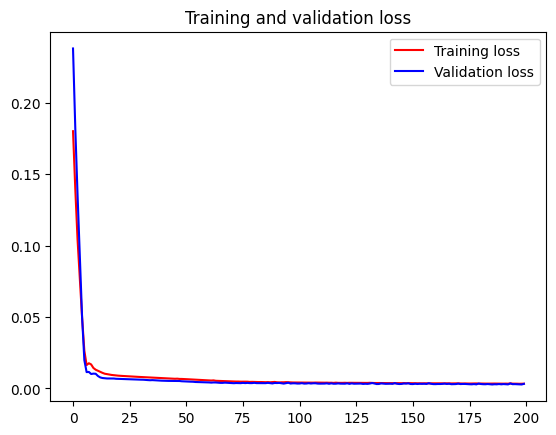

In [24]:
import matplotlib.pyplot as plt
# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure and plot the training and validation loss
plt.figure()
plt.plot(loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

# Show the plot
plt.show()

In [25]:
# Transform the predicted values back to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Reshape the original y_train and y_test arrays
o_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
o_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

In [26]:
# Calculate evaluation metrics for the train data
train_rmse = math.sqrt(mean_squared_error(o_ytrain, train_predict))
train_mse = mean_squared_error(o_ytrain, train_predict)
train_mae = mean_absolute_error(o_ytrain, train_predict)

# Calculate evaluation metrics for the test data
test_rmse = math.sqrt(mean_squared_error(o_ytest, test_predict))
test_mse = mean_squared_error(o_ytest, test_predict)
test_mae = mean_absolute_error(o_ytest, test_predict)

# Print the evaluation metrics
print("Train data RMSE: ", train_rmse)
print("Train data MSE: ", train_mse)
print("Train data MAE: ", train_mae)
print("-----------------------------------------------------")
print("Test data RMSE: ", test_rmse)
print("Test data MSE: ", test_mse)
print("Test data MAE: ", test_mae)

Train data RMSE:  2167.925698325643
Train data MSE:  4699901.833460728
Train data MAE:  1717.0821659778321
-----------------------------------------------------
Test data RMSE:  2131.356200561472
Test data MSE:  4542679.253671835
Test data MAE:  1682.1159555769227


In [27]:
# Calculate the explained variance regression score for the train and test data
#The explained variance score provides a useful summary of how well a regression model fits the data
train_explained_variance = explained_variance_score(o_ytrain, train_predict)
test_explained_variance = explained_variance_score(o_ytest, test_predict)

# Print the explained variance regression score
print("Train data explained variance regression score:", train_explained_variance)
print("Test data explained variance regression score:", test_explained_variance)

Train data explained variance regression score: 0.9469707052067636
Test data explained variance regression score: 0.9484341222741015


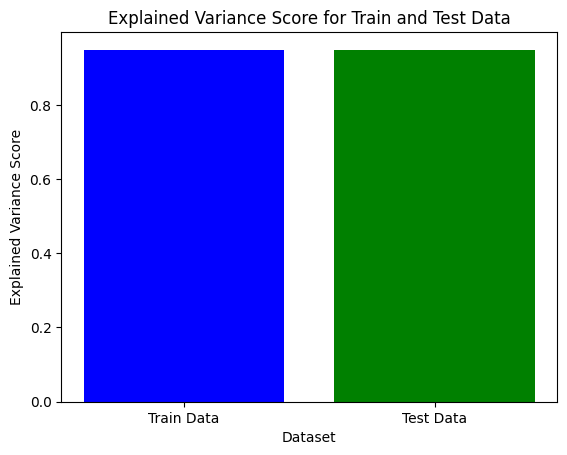

In [28]:
#Visualise the explained variance score

# Create labels and values for train and test data
labels = ['Train Data', 'Test Data']
values = [train_explained_variance, test_explained_variance]

# Create bar positions
x = range(len(labels))

# Create the bar chart
plt.bar(x, values, tick_label=labels, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Explained Variance Score')
plt.title('Explained Variance Score for Train and Test Data')

# Display the plot
plt.show()


In [29]:
# Calculate the R2 score for the train and test data
#R2 score is a statistical metric used to evaluate the goodness of fit of a regression model.
train_r2_score = r2_score(o_ytrain, train_predict)
test_r2_score = r2_score(o_ytest, test_predict)

# Print the R2 score
print("Train data R2 score:", train_r2_score)
print("Test data R2 score:", test_r2_score)

Train data R2 score: 0.9459832092317938
Test data R2 score: 0.9443188999760981


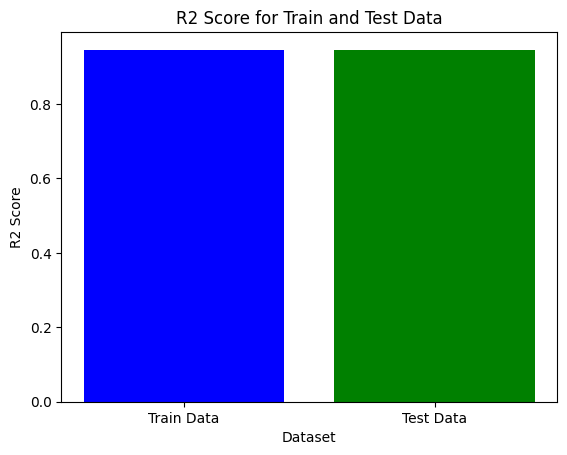

In [30]:
#Visualise the r2score
# Create labels and values for train and test data
labels = ['Train Data', 'Test Data']
values = [train_r2_score, test_r2_score]

# Create bar positions
x = range(len(labels))

# Create the bar chart
plt.bar(x, values, tick_label=labels, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('R2 Score')
plt.title('R2 Score for Train and Test Data')

# Display the plot
plt.show()


In [31]:
import plotly.express as px

# Create arrays to hold the predicted values for plotting
trainPredictPlot = np.full_like(closedf, np.nan)
trainPredictPlot[ts:len(train_predict)+ts, :] = train_predict
testPredictPlot = np.full_like(closedf, np.nan)
testPredictPlot[len(train_predict)+(ts*2)+1:len(closedf)-1, :] = test_predict

# Create a DataFrame for plotting
plotdf = pd.DataFrame({
    'date': close_stock['Date'],
    'original_close': close_stock['Close'],
    'train_predicted_close': trainPredictPlot.reshape(1, -1)[0],
    'test_predicted_close': testPredictPlot.reshape(1, -1)[0]
})

# Plot the data using Plotly
fig = px.line(plotdf, x='date', y=['original_close', 'train_predicted_close', 'test_predicted_close'],
              labels={'value': 'Price', 'date': 'Date'},
              title='Comparison between original close price vs predicted close price')
fig.update_layout(plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.show()

**Below are other Models used during the model selection process. (ARIMA and VAL)**

<Shift> ARIMA

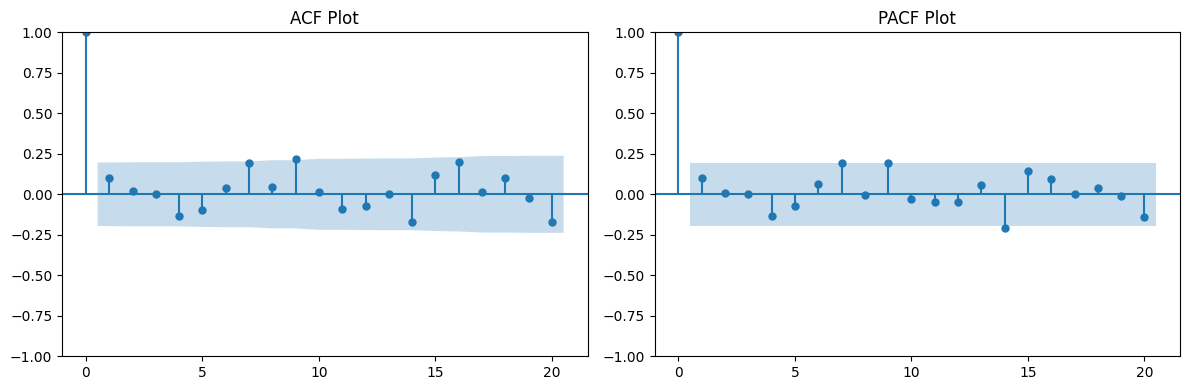

RMSE: 1.0752578727280304
MSE: 1.1561794928636093
MAE: 0.9806913139627188
R2: -1.1367914276255435


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample data (replace with your actual data)
closedf = np.random.randn(100)

# Create ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(closedf, ax=axes[0], lags=20)
plot_pacf(closedf, ax=axes[1], lags=20)
axes[0].set_title("ACF Plot")
axes[1].set_title("PACF Plot")
plt.tight_layout()
plt.show()

# Define ARIMA hyperparameters
p = 1  # Order of Autoregressive (AR) component
d = 1  # Degree of differencing (I)
q = 1  # Order of Moving Average (MA) component

# Create the ARIMA model and fit it to the data
model = ARIMA(closedf, order=(p, d, q))
model_fit = model.fit()

# Specify the number of time steps into the future you want to predict
forecast_steps = 10

# Make predictions
forecast = model_fit.forecast(steps=forecast_steps)

# Sample data for evaluation (replace with your actual data)
actual_values = np.random.randn(10)
predicted_values = forecast

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)
print(f"MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)
print(f"MAE: {mae}")

# Calculate R2
r2 = r2_score(actual_values, predicted_values)
print(f"R2: {r2}")


VAR MODEL

ADF Statistic: -1.1284500246432583
p-value: 0.7035940675803474
Critical Values: {'1%': -3.432788735143374, '5%': -2.862617452702835, '10%': -2.5673435642966767}
Time Series is Non-Stationary
RMSE for Close: 28438.3971009889
RMSE for Volume: 27629439125.62463


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



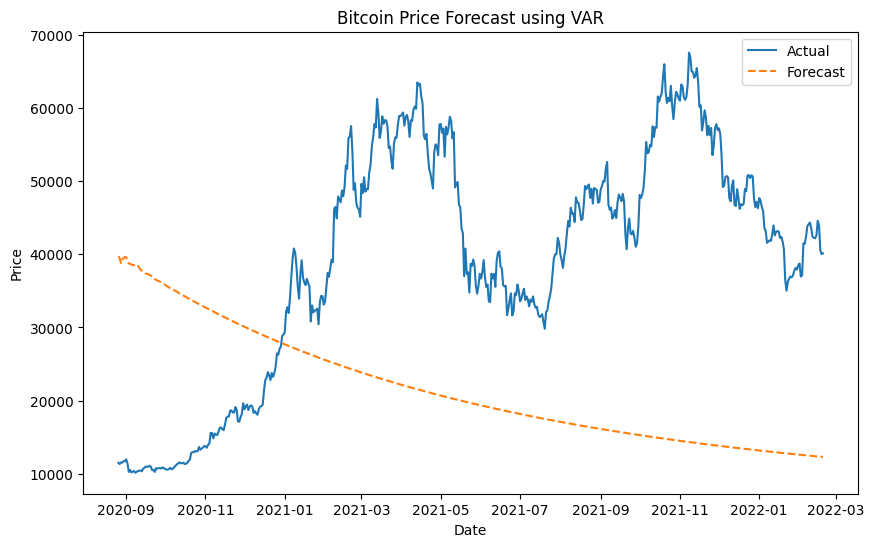

RMSE for Close: 28438.3971009889
MSE for Close: 808742429.6735338
MAE for Close: 26118.92205022925
R2 for Close: -2.195871636891013
RMSE for Volume: 27629439125.62463
MSE for Volume: 7.633859063965972e+20
MAE for Volume: 18016201142.341213
R2 for Volume: -0.5307128913454884


In [33]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Convert data to a DataFrame
df = pd.DataFrame(closedf1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for stationarity and difference if necessary
def test_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] > 0.05:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary")

# Example usage of test_stationarity
test_stationarity(df['Close'])

# Difference the data if necessary
# df_diff = df.diff().dropna()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train, test = df[:train_size], df[train_size:]

# Train VAR model
model = VAR(train)
order = 20  # Order of the VAR model
model_fitted = model.fit(order)

# Forecast using the VAR model
forecast_steps = len(test)
forecast = model_fitted.forecast(test.values, steps=forecast_steps)

# Calculate RMSE for each variable
rmse = np.sqrt(((forecast - test.values) ** 2).mean(axis=0))

# Print the RMSE for each variable
for i, col in enumerate(df.columns):
    print(f"RMSE for {col}: {rmse[i]}")

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Close'], label='Actual')
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast[:, 0], label='Forecast', linestyle='--')  # Replace 0 with the column index of 'Close' in your data
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Forecast using VAR')
plt.legend()
plt.show()

# Calculate RMSE for each variable
rmse_var = np.sqrt(((forecast - test.values) ** 2).mean(axis=0))

# Calculate MSE for each variable
mse_var = ((forecast - test.values) ** 2).mean(axis=0)

# Calculate MAE for each variable
mae_var = np.abs(forecast - test.values).mean(axis=0)

# Calculate R2 for each variable
r2_var = r2_score(test.values, forecast, multioutput='raw_values')

# Print the RMSE, MSE, MAE, and R2 for each variable
for i, col in enumerate(df.columns):
    print(f"RMSE for {col}: {rmse_var[i]}")
    print(f"MSE for {col}: {mse_var[i]}")
    print(f"MAE for {col}: {mae_var[i]}")
    print(f"R2 for {col}: {r2_var[i]}")
